In [56]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
import pandas_datareader as web
plt.style.use("fivethirtyeight")
import datetime as dt
import yfinance as yf

In [57]:
company = 'PETKM.IS'

# Bir başlangıç ​​tarihi ve Bitiş Tarihi tanımlayın
start = dt.datetime(2020,1,1)
end =  dt.datetime(2023,5,1)

# Hisse Senedi Fiyat Verilerini Oku
df = yf.download(company, start , end)

df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,13.88,14.59,13.76,14.46,14.46,81956676
2023-04-04,14.47,14.81,14.34,14.75,14.75,81449548
2023-04-05,14.77,14.85,14.35,14.40,14.40,59238492
2023-04-06,14.41,14.49,14.00,14.14,14.14,43802790
2023-04-07,14.20,14.36,14.12,14.17,14.17,44947607
2023-04-10,14.29,14.88,14.29,14.88,14.88,70819189
2023-04-11,14.98,15.04,14.79,14.94,14.94,74699415
2023-04-12,14.96,15.15,14.93,15.14,15.14,81372889
2023-04-13,15.24,15.38,14.88,14.90,14.90,66998379


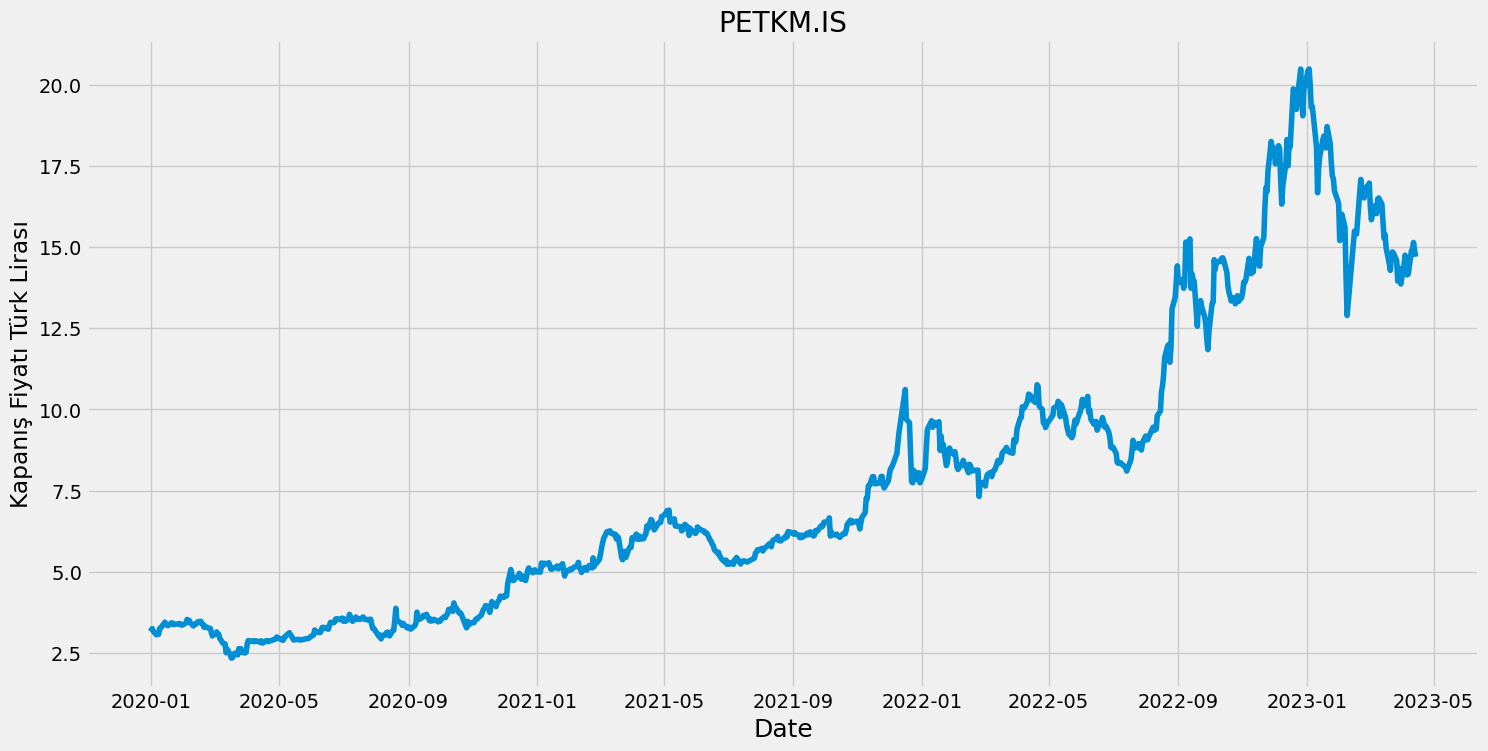

In [58]:
#Verileri filtrele
data = df.filter(["Close"])

#Görselleştirme
plt.figure(figsize=(16,8))
plt.plot(data["Close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası")
plt.title("PETKM.IS")
plt.show()

In [59]:
#Yalnızca Kapat sütunuyla yeni bir DataFrame oluştur
data = df.filter(["Close"])

#Veri çerçevesini bir numpy dizisine dönüştür
dataset = data.values

#Modeli eğitmek için satır sayısını al
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

660


In [60]:
#Verileri ölçeklendir
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[4.54837841e-02],
       [5.00781405e-02],
       [4.54837841e-02],
       [3.95111786e-02],
       [4.13488923e-02],
       [4.04300683e-02],
       [5.05375525e-02],
       [5.09969645e-02],
       [5.83479242e-02],
       [6.11045144e-02],
       [5.69696226e-02],
       [5.55913209e-02],
       [5.51318563e-02],
       [5.97262128e-02],
       [5.97262128e-02],
       [5.69696226e-02],
       [5.69696226e-02],
       [5.78884465e-02],
       [5.78884465e-02],
       [5.88073362e-02],
       [5.69696226e-02],
       [5.60507460e-02],
       [5.65101580e-02],
       [5.97262128e-02],
       [6.56988183e-02],
       [6.43205166e-02],
       [6.38611046e-02],
       [6.01856247e-02],
       [5.46724444e-02],
       [5.74290345e-02],
       [5.74290345e-02],
       [5.88073362e-02],
       [6.15639264e-02],
       [6.24828029e-02],
       [5.83479242e-02],
       [5.78884465e-02],
       [5.23752662e-02],
       [5.42130324e-02],
       [5.09969645e-02],
       [5.09969645e-02],


In [61]:
#Eğitim veri setini oluştur
#Ölçeklendirilmiş eğitim veri setini oluştur

train_data = scaled_data[0:training_data_len,:]

#Verileri x_train ve y_train veri kümelerine ayırın
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.04548378, 0.05007814, 0.04548378, 0.03951118, 0.04134889,
       0.04043007, 0.05053755, 0.05099696, 0.05834792, 0.06110451,
       0.05696962, 0.05559132, 0.05513186, 0.05972621, 0.05972621,
       0.05696962, 0.05696962, 0.05788845, 0.05788845, 0.05880734,
       0.05696962, 0.05605075, 0.05651016, 0.05972621, 0.06569882,
       0.06432052, 0.0638611 , 0.06018562, 0.05467244, 0.05742903,
       0.05742903, 0.05880734, 0.06156393, 0.0624828 , 0.05834792,
       0.05788845, 0.05237527, 0.05421303, 0.05099696, 0.05099696,
       0.05053755, 0.04318666, 0.03767348, 0.04134889, 0.04456496,
       0.04134889, 0.04043007, 0.03353859, 0.0252688 , 0.02434993,
       0.02434993, 0.00918866, 0.01516127, 0.00551318, 0.        ,
       0.00045946, 0.00505377, 0.00826978, 0.00551318, 0.01608014])]
[0.013782964084672139]



In [62]:
#x_train ve y_train'i numpy dizilerine dönüştür
x_train,y_train = np.array(x_train),np.array(y_train)

In [63]:
#Verileri yeniden şekillendir
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(600, 60, 1)

In [64]:
#LSTM Modelini Oluşturun
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [65]:
#Modeli derle
model.compile(optimizer="adam",loss="mean_squared_error")

In [66]:
#Modeli eğit
model.fit(x_train,y_train,batch_size=1, epochs=1)

600/600 [==============================] - 9s 12ms/step - loss: 0.0018


In [67]:
#Test veri setini oluştur
#1543'ten 2003'e ölçeklenmiş değerler içeren yeni bir dizi oluştur

test_data = scaled_data[training_data_len - 60:, :]

#x_test ve y_test veri kümelerini oluştur

x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [68]:
#Verileri bir numpy dizisine dönüştür
x_test = np.array(x_test)

In [69]:
#Verileri yeniden şekillendir
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [70]:
#Modellerin tahmin edilen fiyat değerlerini alın
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 0s 8ms/step


In [71]:
#Kök ortalama kare hatasını al (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

0.5896119493426699

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_8860\4049389140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


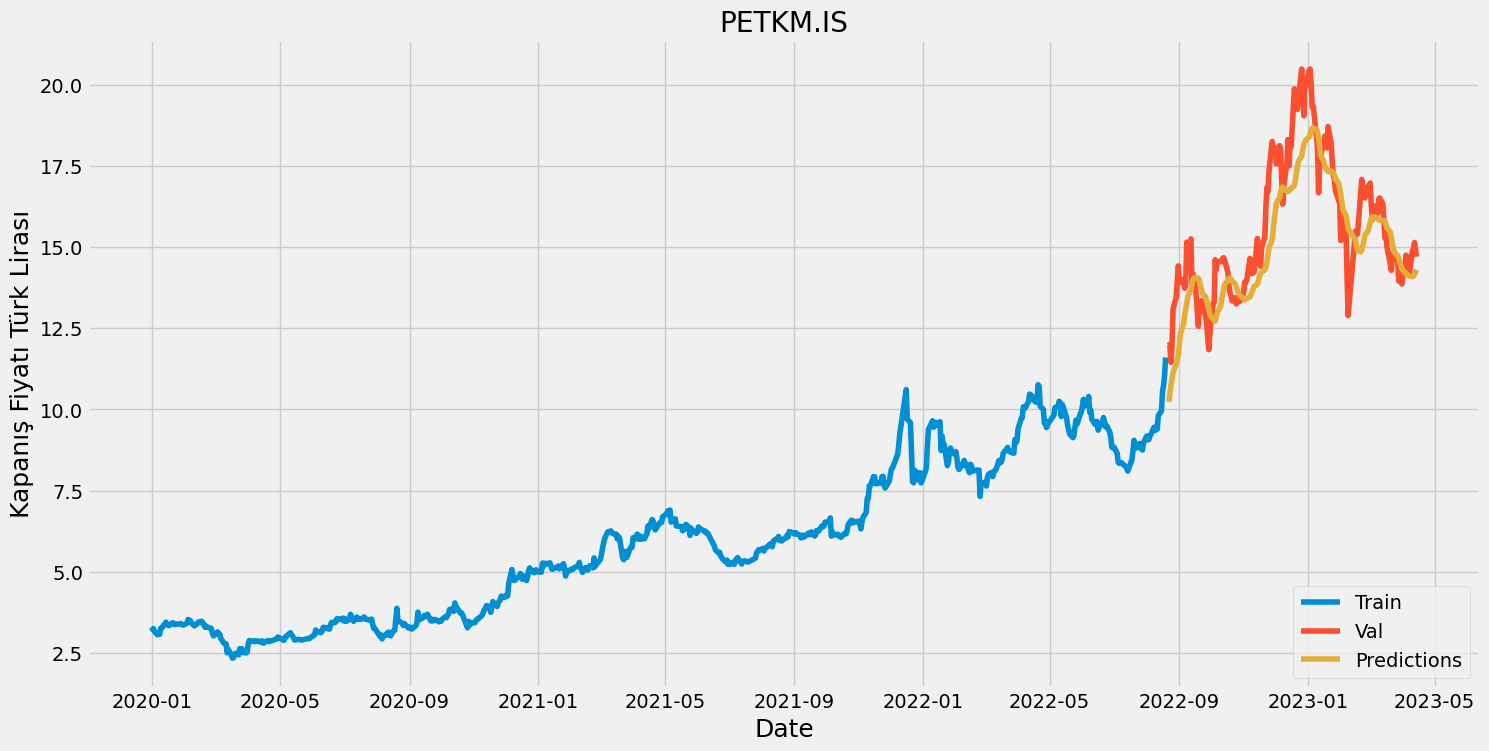

In [72]:
#Verileri çiz
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

#Verileri görselleştirin
plt.figure(figsize=(16,8))
plt.title("PETKM.IS")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası",fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Val","Predictions"], loc="lower right")
plt.show()